># <center>LAB 3 - Foreign Languages

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **5 BSC DS** <br>

>_[Github Link](https://github.com/Krishnaa-tech/NLP.git)_

>## <center>Indian Language Analysis

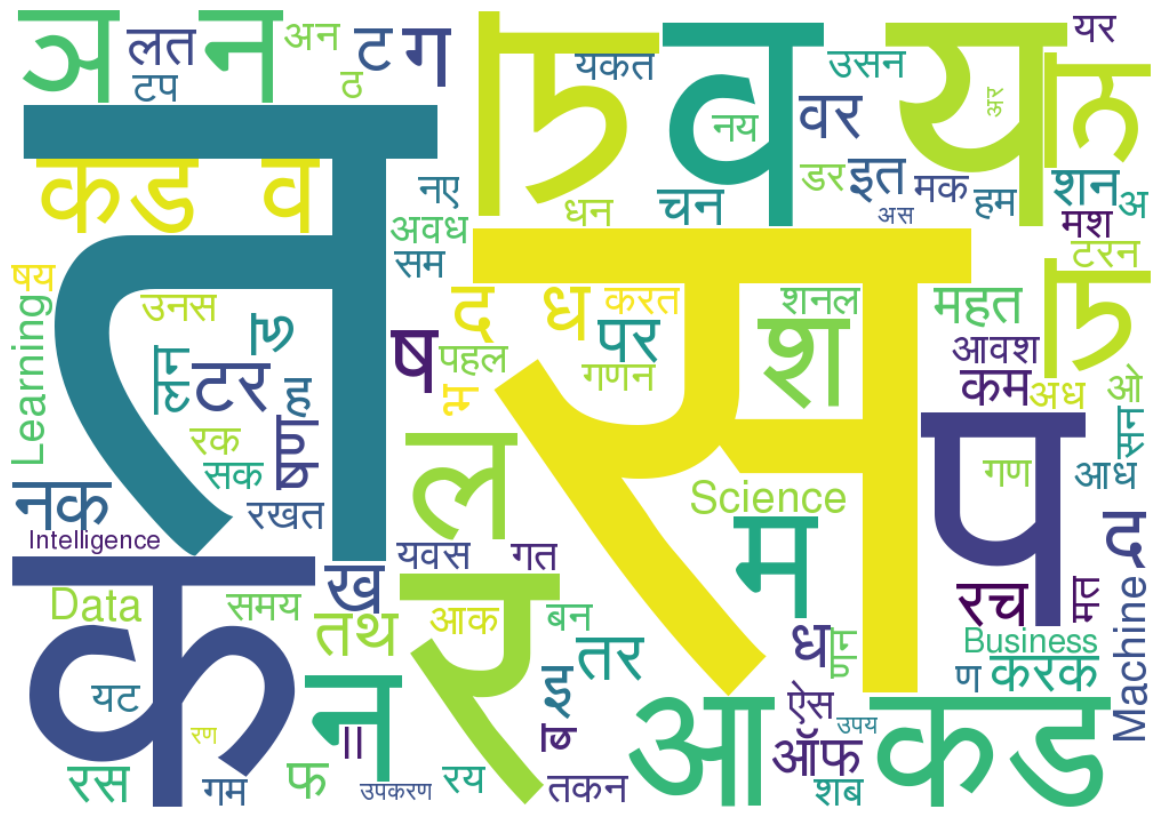

विज्ञान: 9
आँकड़ा: 5
रूप: 4
आँकड़ों: 3
विश्लेषण: 3
जानकारी: 3
सांख्यिकी: 3
तथा: 3
क्षेत्र: 3
विकास: 3


In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from indicnlp.tokenize import indic_tokenize

# Read text from a TXT file
file_path = 'hindi.txt'  # Replace with the path to your Hindi text file

with open(file_path, 'r', encoding='utf-8') as file:
    text_from_file = file.read()

# Tokenize the text using indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens

tokens = tokenization(text_from_file)

# Join the tokens into a list
df_list = tokens

# Defining stopwords and punctuations 
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn', 'n', '।', '/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}', '|', '"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

# Remove stopwords and punctuations
cleaned_tokens = [token for token in df_list if token not in to_be_removed]

# Join the cleaned tokens into a single string
cleaned_text = ' '.join(cleaned_tokens)

# Create a word cloud
font_path = 'gargi.ttf'  # Replace with the path to your Hindi font file
wordcloud = WordCloud(width=1000, height=700,
                      background_color='white',
                      min_font_size=10, font_path=font_path).generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(18, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Create a Counter for word frequencies
word_frequencies = Counter(cleaned_tokens)

# Print the most common words and their frequencies
most_common_words = word_frequencies.most_common(10)  # Change the number to get more or fewer words
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')


>## <center>Foreign Language Analysis

données: 26
science: 9
analyse: 4
bases: 4
cette: 4
massives: 3
apprentissage: 3
automatique: 3
discipline: 3
a: 3


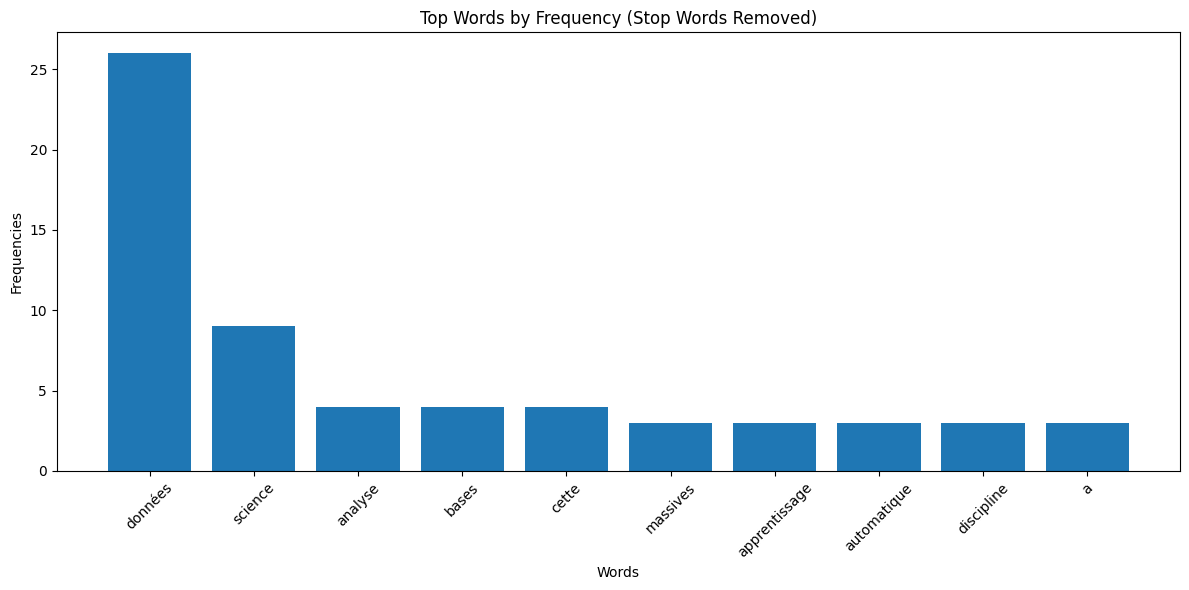

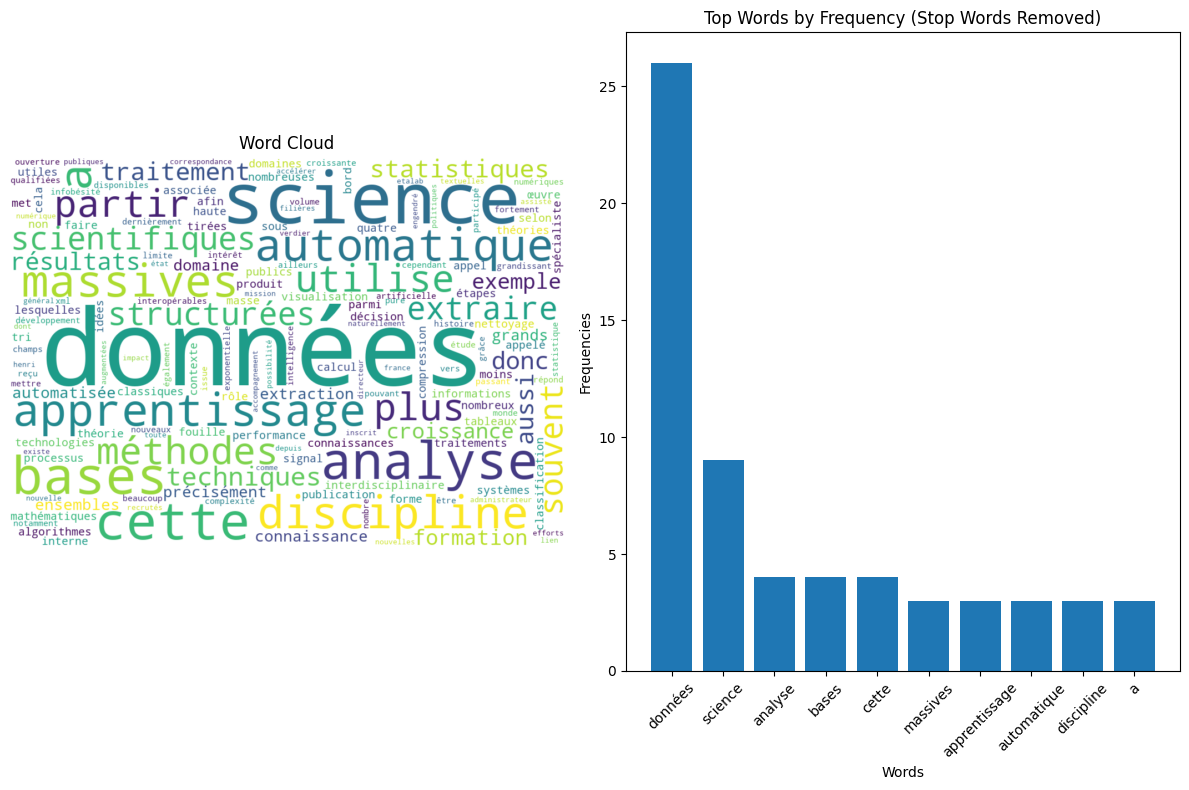

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Load the French stopwords
french_stopwords = set(stopwords.words('french'))

# Read text from a TXT file (replace 'your_file.txt' with the path to your file)
with open('french.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text
words = word_tokenize(text, language='french')

# Remove stopwords and non-alphabetic words
words = [word.lower() for word in words if word.isalpha() and word.lower() not in french_stopwords]

# Calculate word frequencies
word_freq = Counter(words)

# Print the most common words and their frequencies
most_common = word_freq.most_common(10)  # Change the number to get more or fewer words
for word, freq in most_common:
    print(f'{word}: {freq}')

# Create a word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate_from_frequencies(word_freq)

# Create a bar chart
top_words, top_frequencies = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top Words by Frequency (Stop Words Removed)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the word cloud and the bar chart
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')

plt.subplot(1, 2, 2)
plt.bar(top_words, top_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top Words by Frequency (Stop Words Removed)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()
